In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import plotly.express as px

In [61]:
file= '/Users/farhad/Desktop/Frauser /Datasets/airlines_data.xlsx'

In [62]:
airdata= pd.read_excel(file)

In [111]:
airdata.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,airline
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,IndiGo
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,Air India
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,Jet Airways
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,IndiGo
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,IndiGo


In [64]:
airdata.info()
airdata.isnull().sum()
airdata.ffill(inplace= True)
airdata.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [112]:
# Deals with categorical data and turn it into methemetiocal unit
airdata.columns
airdata['Airline'].unique().tolist()

['IndiGo',
 'Air India',
 'Jet Airways',
 'SpiceJet',
 'Multiple carriers',
 'GoAir',
 'Vistara',
 'Air Asia',
 'Vistara Premium economy',
 'Jet Airways Business',
 'Multiple carriers Premium economy',
 'Trujet']

In [120]:
airdata['Airline']= np.where(airdata['Airline']== 'Vistara Premium economy', 'Vistara', airdata['Airline'])
airdata['Airline']= np.where(airdata['Airline']== 'Jet Airways Business', 'Jet Airways', airdata['Airline'])

In [121]:
airdata['Airline'].unique().tolist()

['IndiGo',
 'Air India',
 'Jet Airways',
 'SpiceJet',
 'Multiple carriers',
 'GoAir',
 'Vistara',
 'Air Asia',
 'Multiple carriers Premium economy',
 'Trujet']

# One hot encoding 
+ get_dummies()


In [122]:
dataset= pd.get_dummies(data= airdata, columns= ['Airline', 'Source', 'Destination'])

dataset.head()

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,airline,Airline_Air Asia,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,24/03/2019,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,IndiGo,False,...,False,False,False,False,False,False,False,False,False,True
1,1/05/2019,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,Air India,False,...,False,False,True,False,True,False,False,False,False,False
2,9/06/2019,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,Jet Airways,False,...,False,True,False,False,False,True,False,False,False,False
3,12/05/2019,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,IndiGo,False,...,False,False,True,False,True,False,False,False,False,False
4,01/03/2019,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,IndiGo,False,...,False,False,False,False,False,False,False,False,False,True


In [123]:
print(dataset.shape , 'and', airdata.shape)  


(10683, 30) and (10683, 12)


In [124]:
dataset['Total_Stops'].value_counts()
# Here we can see that total stop is categorical data type so we will encode it wilth label encoding 
dataset.replace({'1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4, 'non-stop': 0}, inplace= True)

/var/folders/kx/t7xsn3md0wxf_6_gg_5dqyrm0000gn/T/ipykernel_15729/1682939461.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({'1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4, 'non-stop': 0}, inplace= True)


In [125]:
# Transformation of the Duretion time columns 
duration = dataset['Duration'].tolist() # we take all the duretion information inside of the list 
for i in range(len(duration)):
    if len(duration[i].split()) !=2:
        if 'h' in duration[i]:
            duration[i]= duration[i].strip()+ ' 0m' # remove leading and trailing whitespace
        elif 'm' in duration[i]:
            duration[i]= '0h {}'.format(duration[i].strip())
dur_hours=[]
dur_minute= []

In [126]:
for i in range(len(duration)):
    dur_hours.append(int(duration[i].split()[0][:-1]))
    dur_minute.append(int(duration[i].split()[1][:-1]))

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,airline,Airline_Air Asia,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,24/03/2019,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,IndiGo,False,...,False,False,False,False,False,False,False,False,False,True
1,1/05/2019,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,Air India,False,...,False,False,True,False,True,False,False,False,False,False
2,9/06/2019,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,Jet Airways,False,...,False,True,False,False,False,True,False,False,False,False
3,12/05/2019,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,IndiGo,False,...,False,False,True,False,True,False,False,False,False,False
4,01/03/2019,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,IndiGo,False,...,False,False,False,False,False,False,False,False,False,True


In [130]:
dataset['Duration_Hours']= dur_hours
dataset['Duration_Minutes']= dur_minute
dataset.loc[:, 'Duration_Hours'] *= 60

In [131]:
dataset.head()

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,airline,Airline_Air Asia,...,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Duration_Hours,Duration_Minutes
0,24/03/2019,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,IndiGo,False,...,False,False,False,False,False,False,False,True,120,50
1,1/05/2019,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,Air India,False,...,True,False,True,False,False,False,False,False,420,25
2,9/06/2019,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,Jet Airways,False,...,False,False,False,True,False,False,False,False,1140,0
3,12/05/2019,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,IndiGo,False,...,True,False,True,False,False,False,False,False,300,25
4,01/03/2019,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,IndiGo,False,...,False,False,False,False,False,False,False,True,240,45


In [132]:
dataset['Duration_Total_Hours']= dataset['Duration_Hours'] + dataset['Duration_Minutes']

In [74]:
dataset.head()

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,airline,Airline_Air Asia,...,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Duration_Hours,Duration_Minutes,Duration_Total_Hours
0,24/03/2019,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,IndiGo,False,...,False,False,False,False,False,False,True,120,50,170
1,1/05/2019,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,Air India,False,...,False,True,False,False,False,False,False,420,25,445
2,9/06/2019,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,Jet Airways,False,...,False,False,True,False,False,False,False,1140,0,1140
3,12/05/2019,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,IndiGo,False,...,False,True,False,False,False,False,False,300,25,325
4,01/03/2019,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,IndiGo,False,...,False,False,False,False,False,False,True,240,45,285


In [133]:
dataset['Dep_Hour'] = pd.to_datetime(dataset['Dep_Time'], format='%H:%M').dt.hour
dataset['Dep_Min'] = pd.to_datetime(dataset['Dep_Time'], format='%H:%M').dt.minute


It forces pandas to handle invalid date/time values safely.

🔍 Without errors='coerce':
If any value in Arrival_Time is not in a proper format, pandas will throw an error and stop execution.

In [134]:
# arrival time transformation
dataset['Arri_Hour'] = pd.to_datetime(dataset['Arrival_Time'], errors='coerce').dt.hour
dataset['Arri_Min'] = pd.to_datetime(dataset['Arrival_Time'], errors='coerce').dt.minute


/var/folders/kx/t7xsn3md0wxf_6_gg_5dqyrm0000gn/T/ipykernel_15729/3483403192.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset['Arri_Hour'] = pd.to_datetime(dataset['Arrival_Time'], errors='coerce').dt.hour
/var/folders/kx/t7xsn3md0wxf_6_gg_5dqyrm0000gn/T/ipykernel_15729/3483403192.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset['Arri_Min'] = pd.to_datetime(dataset['Arrival_Time'], errors='coerce').dt.minute


# Spliting departure and arrival time intop time zone 


pd.cut() is used to bin or discretize continuous numerical data into categories.

Here you're telling pandas:

"Divide the Dep_Hour values into these intervals (bins): [0, 6, 12, 18, 24]"

That creates the following intervals:

0–6 → Night

6–12 → Morning

12–18 → Afternoon

18–24 → Evening


In [135]:
# pd.cut() is used to bin or discretize continuous numerical data into categories.


dataset['dep_timezone']= pd.cut(dataset.Dep_Hour, [0, 6, 12, 18, 24],
                                labels= ['Night', 'Morning', 'Afternoon', 'Evening'])
dataset['dep_timezone']

0          Evening
1            Night
2          Morning
3        Afternoon
4        Afternoon
           ...    
10678      Evening
10679      Evening
10680      Morning
10681      Morning
10682      Morning
Name: dep_timezone, Length: 10683, dtype: category
Categories (4, object): ['Night' < 'Morning' < 'Afternoon' < 'Evening']

In [141]:
dataset['Arrival_timezone']= pd.cut(dataset.Arri_Hour, [0, 6, 12, 18, 24],
                                labels= ['Night', 'Morning', 'Afternoon', 'Evening'])
dataset['Arrival_timezone']

0            Night
1        Afternoon
2            Night
3          Evening
4          Evening
           ...    
10678      Evening
10679      Evening
10680      Morning
10681    Afternoon
10682      Evening
Name: Arrival_timezone, Length: 10683, dtype: category
Categories (4, object): ['Night' < 'Morning' < 'Afternoon' < 'Evening']

In [142]:
# Transform the date of journy columns
dataset['Month']= pd.to_datetime(dataset['Date_of_Journey'], format= "%d/%m/%Y").dt.month


In [143]:
dataset['Day_of_week']= pd.to_datetime(dataset['Date_of_Journey']).dt.day_name()
dataset['Day_of_week']

dataset.columns


/var/folders/kx/t7xsn3md0wxf_6_gg_5dqyrm0000gn/T/ipykernel_15729/2449486201.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dataset['Day_of_week']= pd.to_datetime(dataset['Date_of_Journey']).dt.day_name()


Index(['Date_of_Journey', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration',
       'Total_Stops', 'Additional_Info', 'Price', 'airline',
       'Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Source_Banglore',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Banglore', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi',
       'Duration_Hours', 'Duration_Minutes', 'Duration_Total_Hours',
       'Dep_Hour', 'Dep_Min', 'Arri_Hour', 'Arri_Min', 'dep_timezone',
       'Arrival_timezone', 'Month', 'Day_of_week'],
      dtype='object')

In [153]:
dataset1= dataset[['Total_Stops',
       'Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Source_Banglore',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Banglore', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi',
       'Duration_Hours', 'Duration_Minutes', 'Duration_Total_Hours',
       'Dep_Hour', 'Dep_Min', 'Price' ]]
dataset1

,Total_Stops,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Duration_Hours,Duration_Minutes,Duration_Total_Hours,Dep_Hour,Dep_Min,Price
0,0,False,False,False,True,False,False,False,False,False,...,False,False,False,True,120,50,170,22,20,3897
1,2,False,True,False,False,False,False,False,False,False,...,False,False,False,False,420,25,445,5,50,7662
2,2,False,False,False,False,True,False,False,False,False,...,False,False,False,False,1140,0,1140,9,25,13882
3,1,False,False,False,True,False,False,False,False,False,...,False,False,False,False,300,25,325,18,5,6218
4,1,False,False,False,True,False,False,False,False,False,...,False,False,False,True,240,45,285,16,50,13302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,True,False,False,False,False,False,False,False,False,...,False,False,False,False,120,30,150,19,55,4107
10679,0,False,True,False,False,False,False,False,False,False,...,False,False,False,False,120,35,155,20,45,4145
10680,0,False,False,False,False,True,False,False,False,False,...,True,False,False,False,180,0,180,8,20,7229
10681,0,False,False,False,False,False,False,False,False,False,...,False,False,False,True,120,40,160,11,30,12648


In [156]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'berlin',
 'managua',
 'vanimo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',

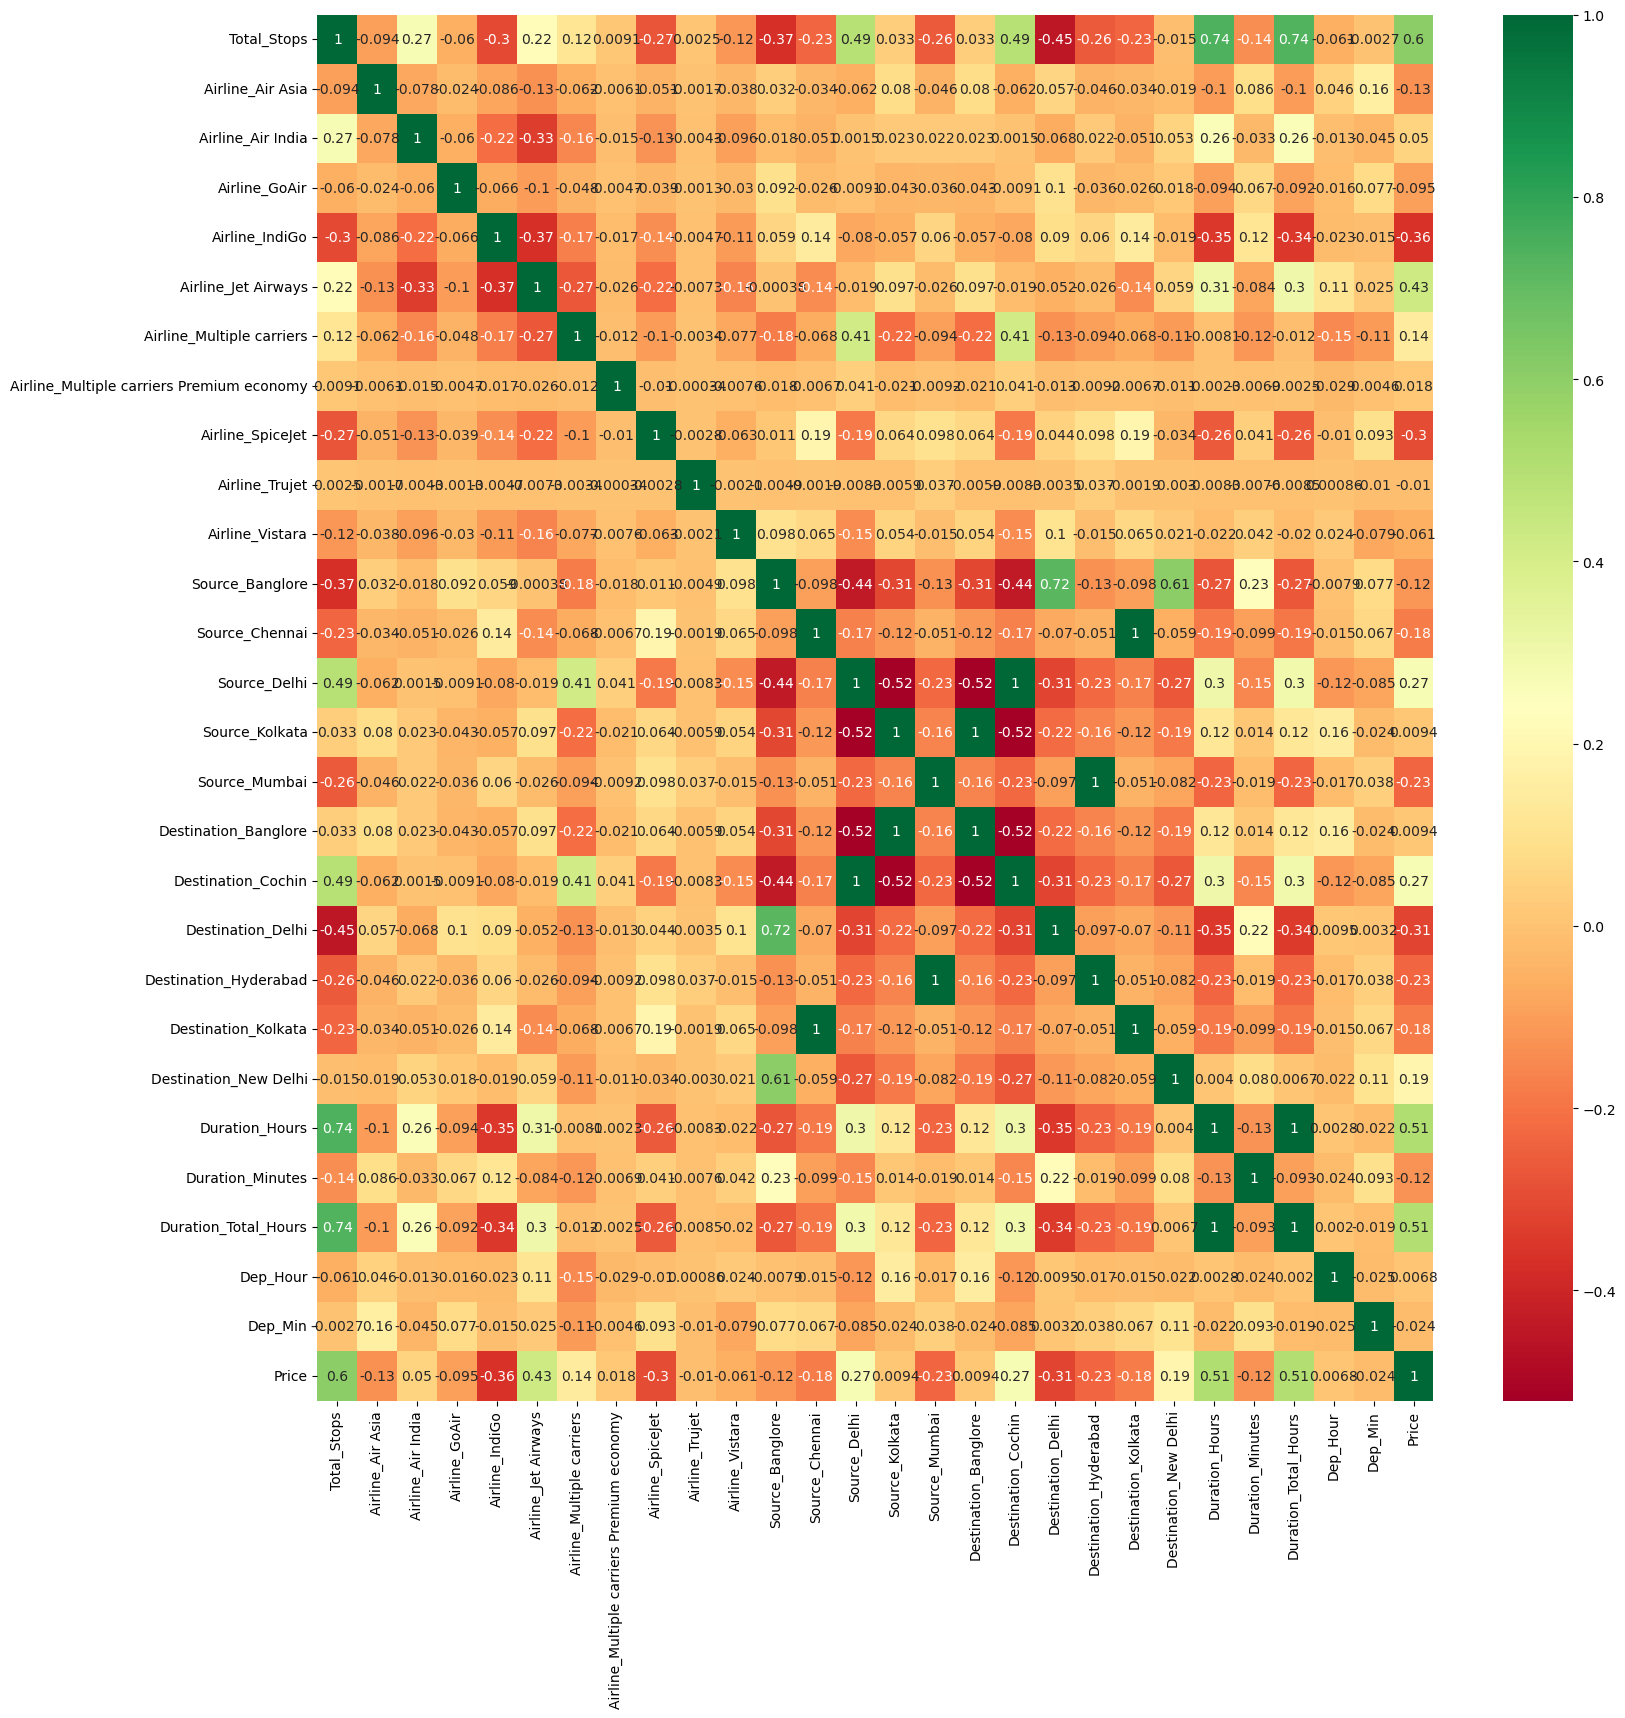

In [159]:
# heatmap construction 
plt.figure(figsize= (18, 18))
sns.heatmap(dataset1.corr(), annot= True, cmap= 'RdYlGn')
plt.show()

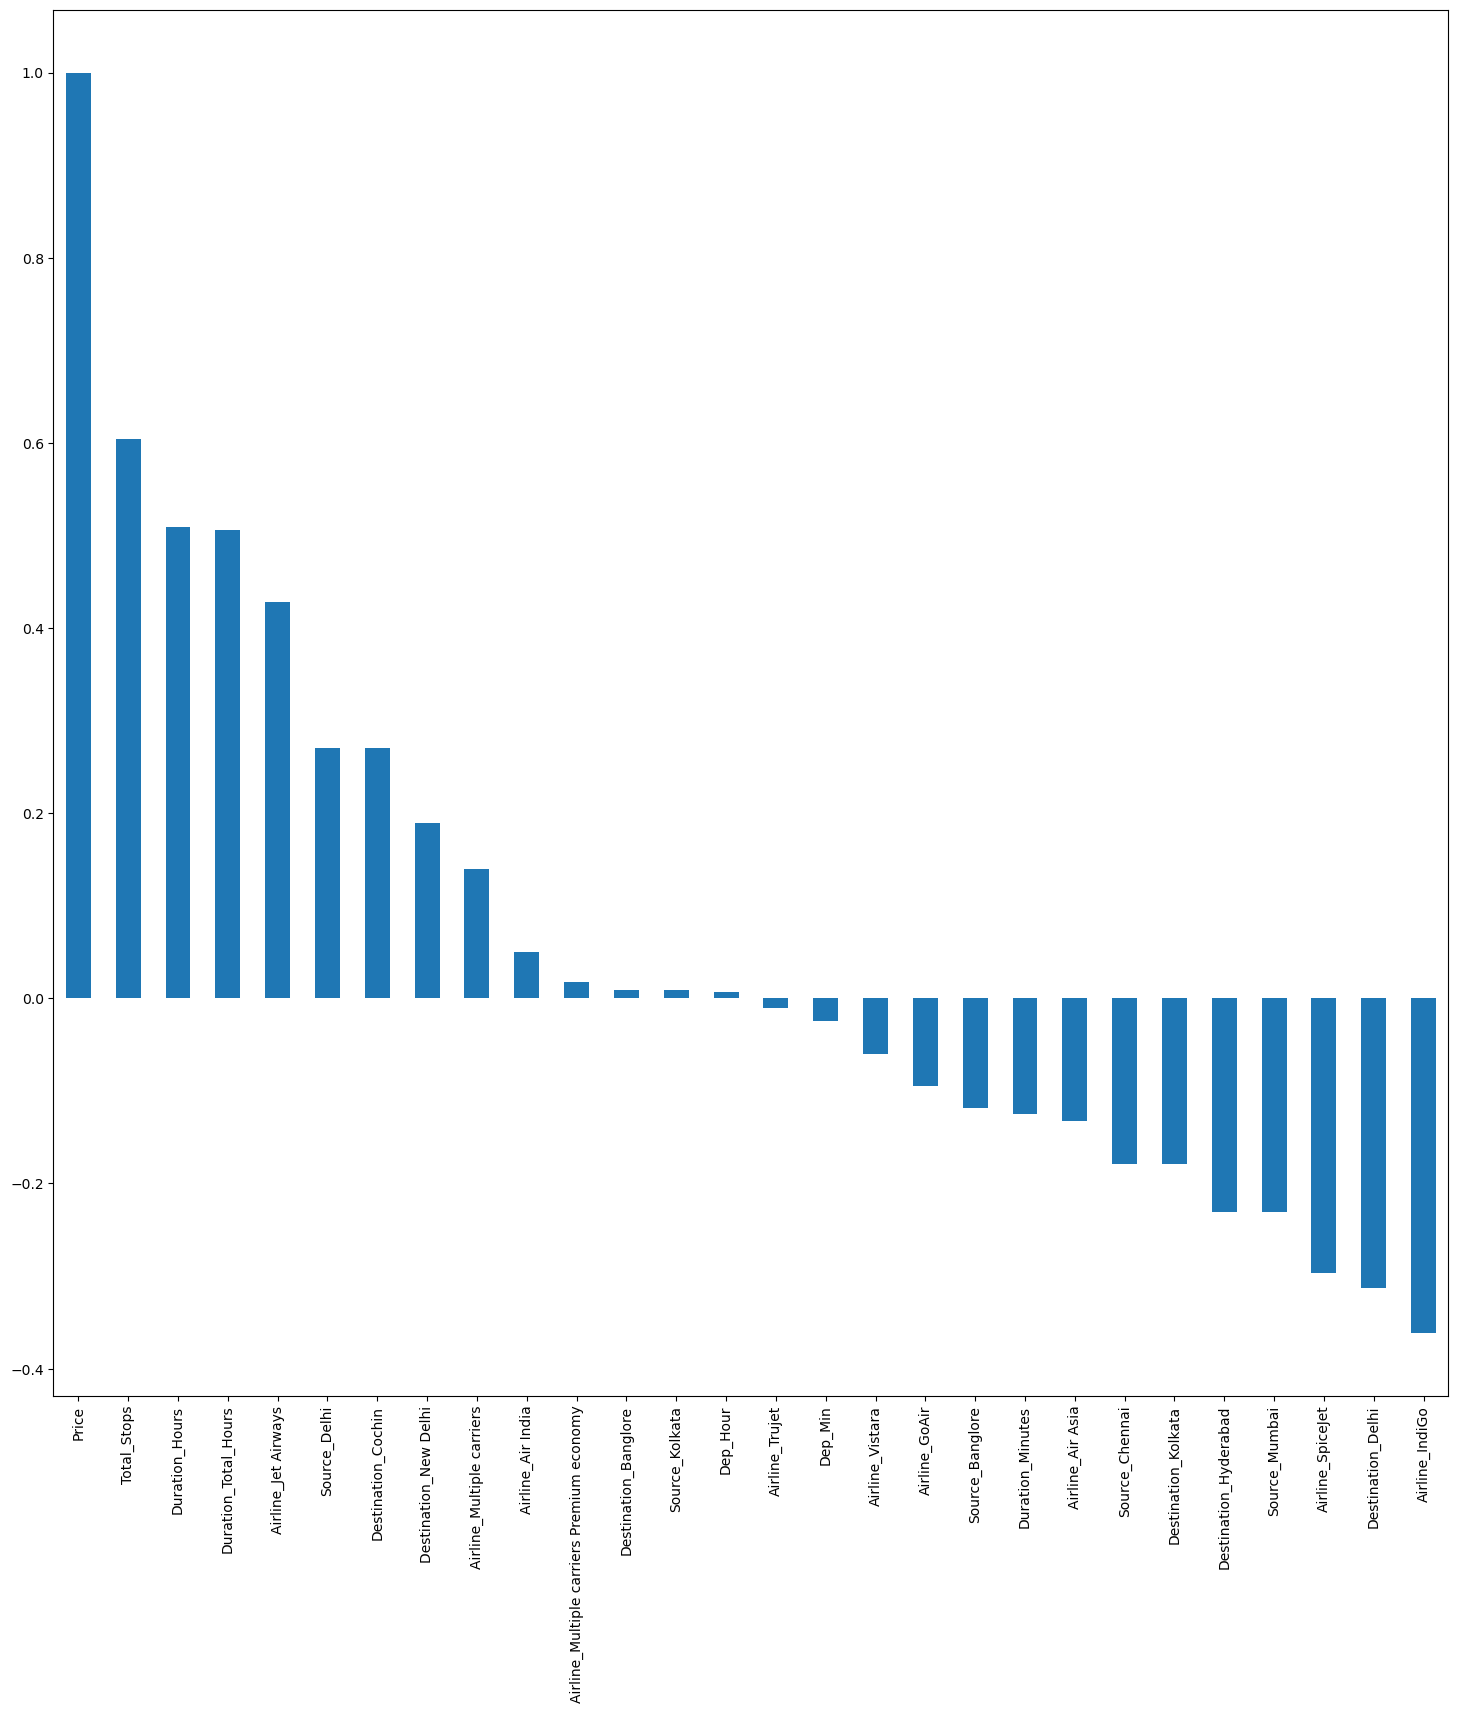

In [172]:
features= dataset1.corr()['Price'].sort_values(ascending= False)
features.plot(kind= 'bar', figsize= (18,18))
plt.show()

# Feature extracdtion using principle component

## PCA with sklearn
Dimentionality reduction is aprt of the feature extraxtion process that combines the existing features to produce more usefull one. the goal of the dimensionaliy reduction is to simplify the data without loosing too much information principal component analysis (PCA) is one of the most popular dimentiuonality reduction algorithem . first it identifies the hyperplane that lies closest to the data and then it projects the data onto it . in this way a few multidimensional feature are marged into one
